# Importation des modules

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importation des modules personnalisés
from src.data.preprocess import load_and_preprocess_data
from src.optimization.gradient_descent import gradient_descent
from src.optimization.proximal_gradient import proximal_gradient_descent
from src.optimization.nesterov import nesterov_accelerated_gradient
from src.optimization.adagrad import adagrad_optimizer
from src.optimization.adam import adam_optimizer
from src.optimization.rmsprop import rmsprop_optimizer
from src.optimization.newton_method import newton_method, quasi_newton_method
from src.optimization.bayesian_optimization import bayesian_optimization
from src.optimization.pso import particle_swarm_optimization
from src.optimization.simulated_annealing import simulated_annealing
from src.utils.helpers import plot_losses, calculate_generalization_error

# Chargement des données

In [4]:
X_train_bias, X_val_bias, X_test_bias, y_train, y_val, y_test = load_and_preprocess_data()

# Entraînement du modèle avec différentes méthodes d'optimisation

In [5]:
# Gradient Descent
weights_grad, train_losses_grad, val_losses_grad, convergence_time_grad = gradient_descent(
    X_train_bias, y_train, X_val_bias, y_val
)

# Proximal Gradient Descent
weights_proxgrad, train_losses_proxgrad, val_losses_proxgrad, convergence_time_proxgrad = proximal_gradient_descent(
    X_train_bias, y_train, X_val_bias, y_val
)

# Nesterov Accelerated Gradient
weights_nag, train_losses_nag, val_losses_nag, convergence_time_nag = nesterov_accelerated_gradient(
    X_train_bias, y_train, X_val_bias, y_val
)

# Adam
weights_adam, train_losses_adam, val_losses_adam, convergence_time_adam = adam_optimizer(
    X_train_bias, y_train, X_val_bias, y_val
)

# RMSprop
weights_rmsprop, train_losses_rmsprop, val_losses_rmsprop, convergence_time_rmsprop = rmsprop_optimizer(
    X_train_bias, y_train, X_val_bias, y_val
)

# Adagrad
weights_adagrad, train_losses_adagrad, val_losses_adagrad, convergence_time_adagrad = adagrad_optimizer(
    X_train_bias, y_train, X_val_bias, y_val
)

# Newton Method
weights_newton, train_losses_newton, val_losses_newton, convergence_time_newton = newton_method(
    X_train_bias, y_train, X_val_bias, y_val
)

# Quasi-Newton (BFGS)
weights_quasi_newton, train_losses_quasi_newton, val_losses_quasi_newton, convergence_time_quasi_newton = quasi_newton_method(
    X_train_bias, y_train, X_val_bias, y_val
)

# Simulated Annealing
weights_simulated_annealing, train_losses_simulated_annealing, val_losses_simulated_annealing, convergence_time_simulated_annealing = simulated_annealing(
    X_train_bias, y_train, X_val_bias, y_val
)

# Bayesian Optimization
weights_bayesian, train_losses_bayesian, val_losses_bayesian, convergence_time_bayesian = bayesian_optimization(
    X_train_bias, y_train, X_val_bias, y_val
)

# PSO
weights_pso, train_losses_pso, val_losses_pso, convergence_time_pso = particle_swarm_optimization(
    X_train_bias, y_train, X_val_bias, y_val
)

/home/ashkaji/Documents/ISE3/DSM/ML Optimization/issea-mloptimization-ise3-2023-2024/src/optimization/newton_method.py:103: RuntimeWarning: divide by zero encountered in divide
  H = H + (s[:, np.newaxis] @ s[np.newaxis, :] / (s @ y_diff)) - (H @ (y_diff[:, np.newaxis] @ y_diff[np.newaxis, :]) @ H) / (y_diff @ H @ y_diff)
/home/ashkaji/Documents/ISE3/DSM/ML Optimization/issea-mloptimization-ise3-2023-2024/src/optimization/newton_method.py:103: RuntimeWarning: invalid value encountered in divide
  H = H + (s[:, np.newaxis] @ s[np.newaxis, :] / (s @ y_diff)) - (H @ (y_diff[:, np.newaxis] @ y_diff[np.newaxis, :]) @ H) / (y_diff @ H @ y_diff)


# Affichage des résultats

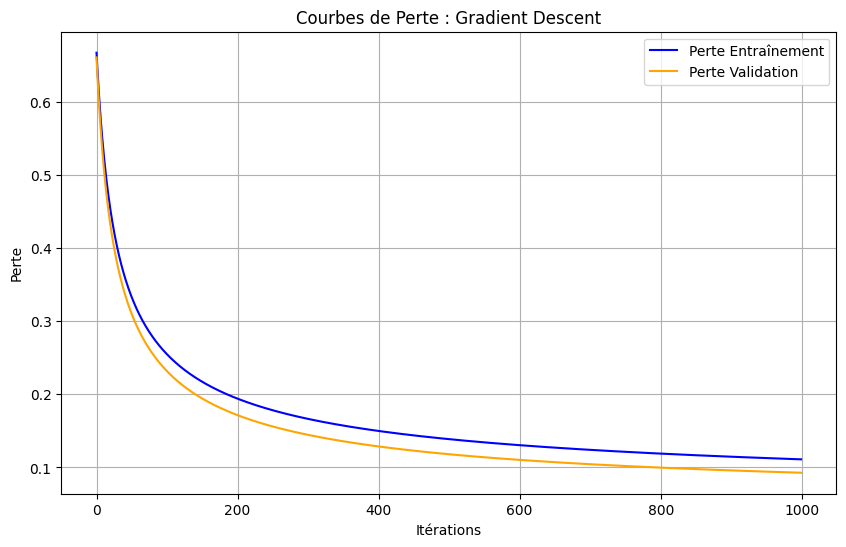

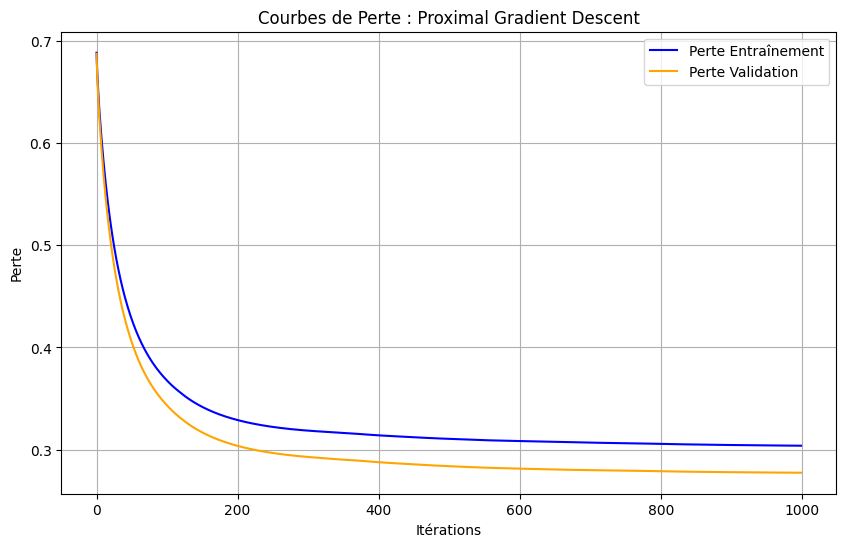

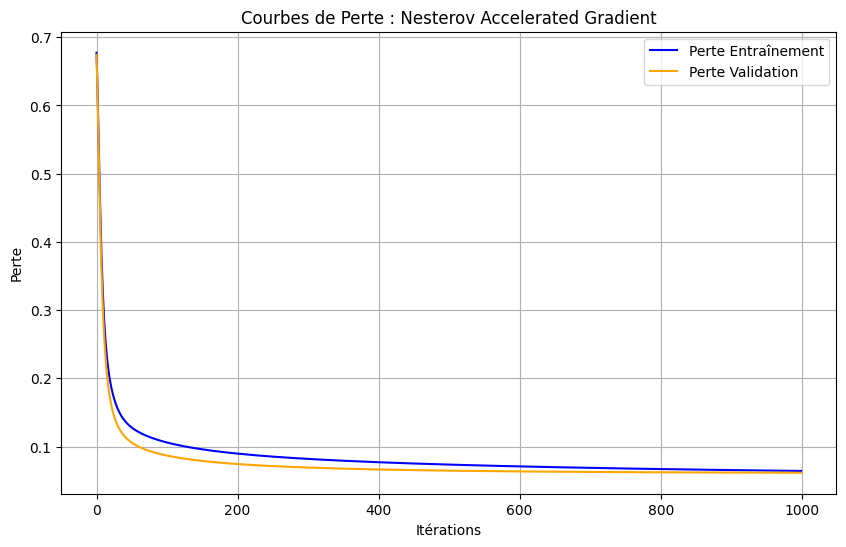

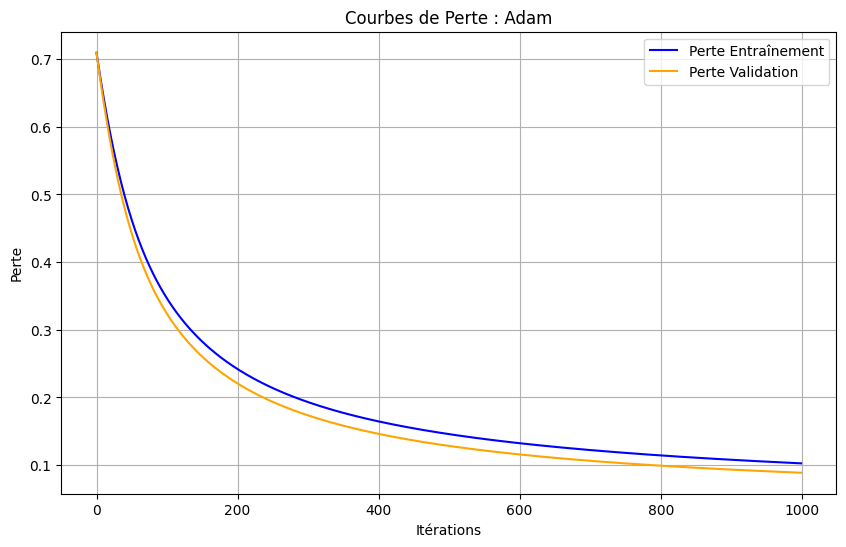

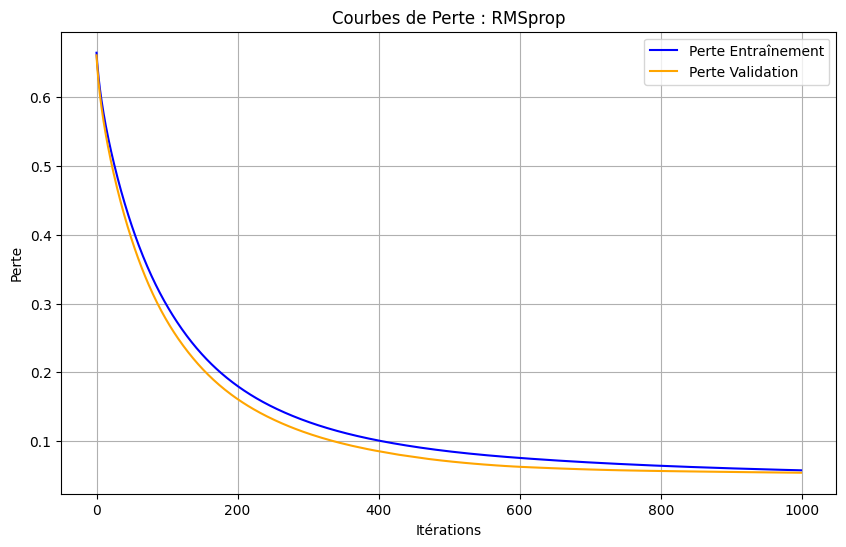

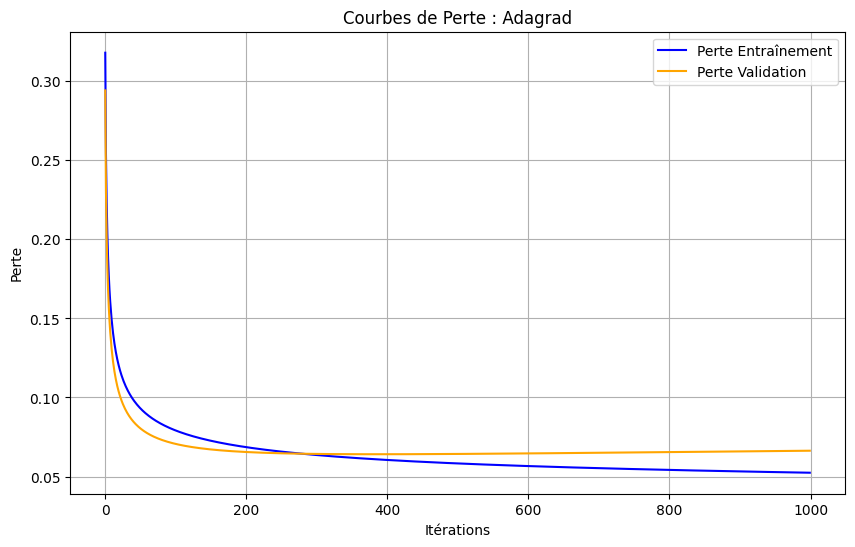

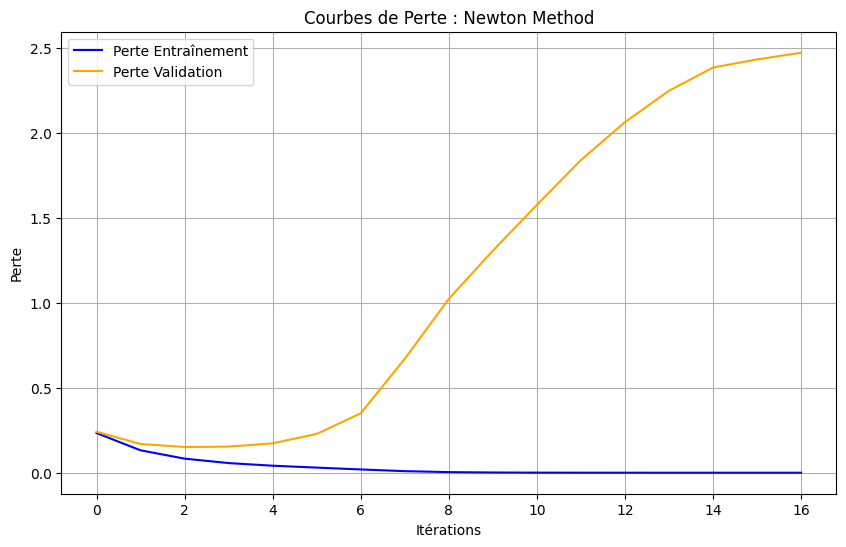

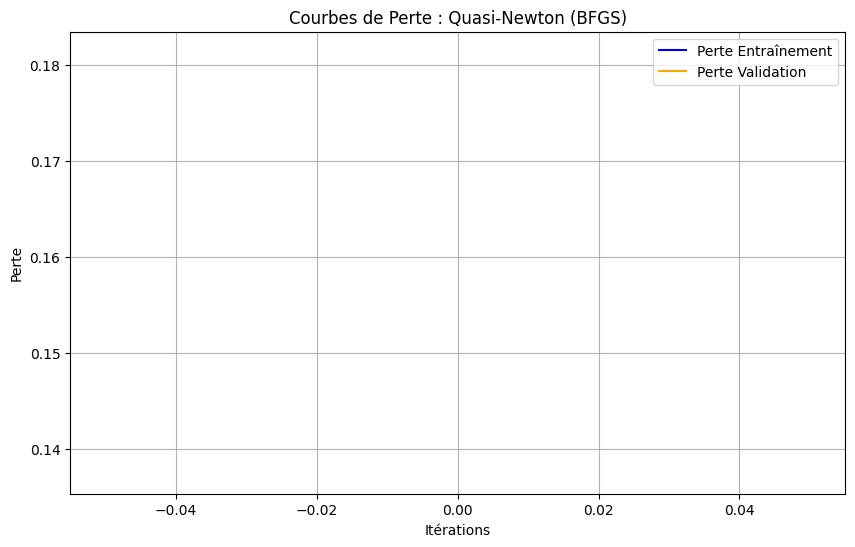

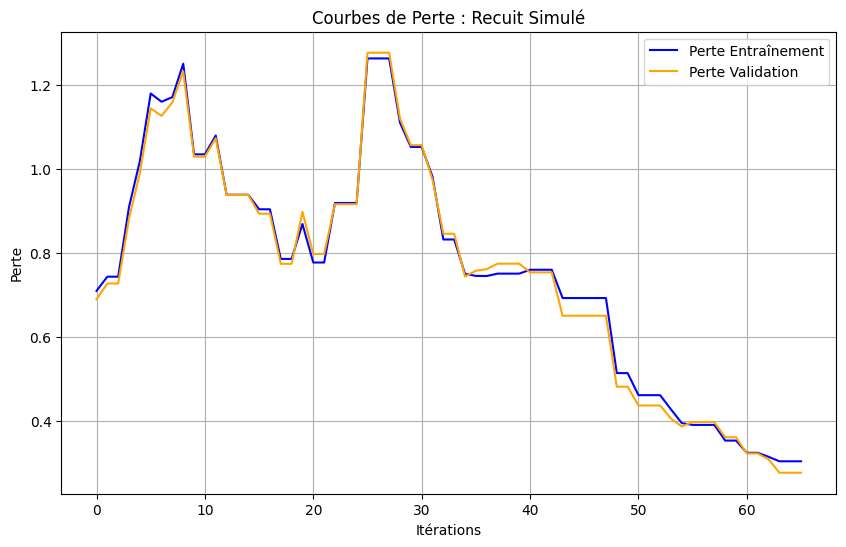

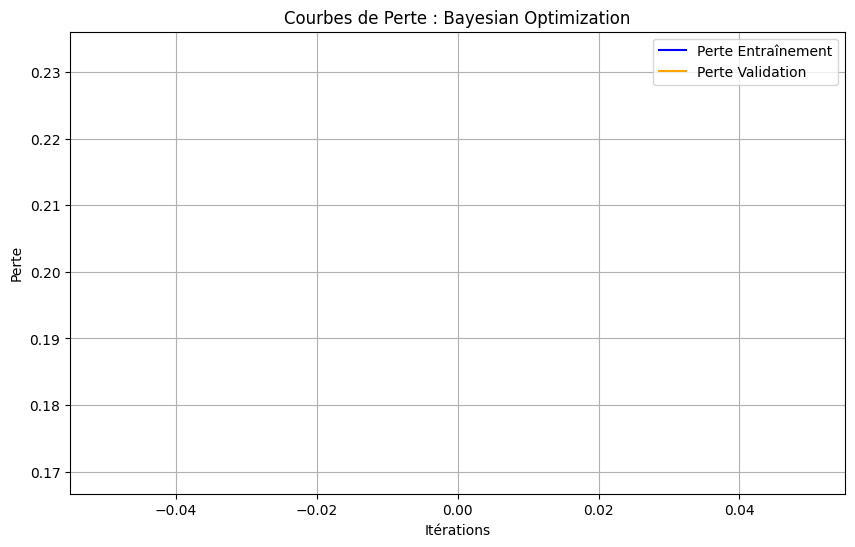

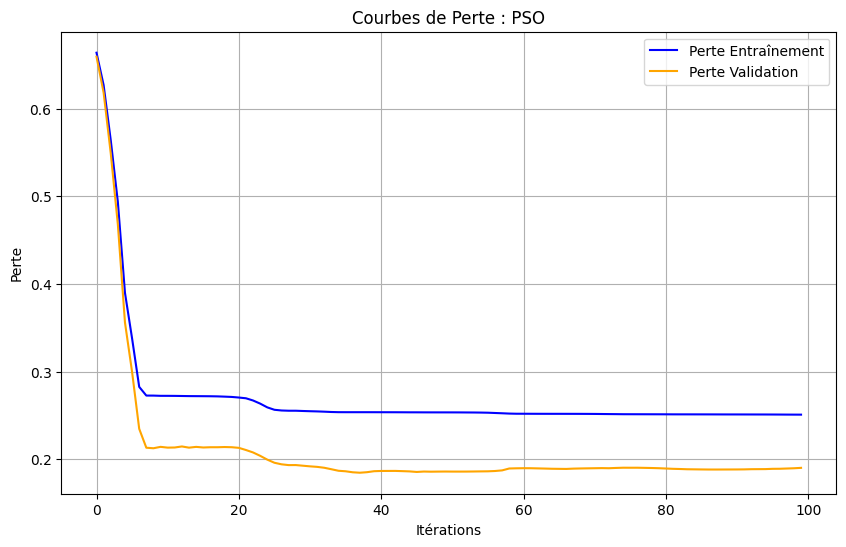

In [6]:
# Tracer les courbes de perte pour chaque méthode
plot_losses(train_losses_grad, val_losses_grad, 'Gradient Descent')
plot_losses(train_losses_proxgrad, val_losses_proxgrad, 'Proximal Gradient Descent')
plot_losses(train_losses_nag, val_losses_nag, 'Nesterov Accelerated Gradient')
plot_losses(train_losses_adam, val_losses_adam, 'Adam')
plot_losses(train_losses_rmsprop, val_losses_rmsprop, 'RMSprop')
plot_losses(train_losses_adagrad, val_losses_adagrad, 'Adagrad')
plot_losses(train_losses_newton, val_losses_newton, 'Newton Method')
plot_losses(train_losses_quasi_newton, val_losses_quasi_newton, 'Quasi-Newton (BFGS)')
plot_losses(train_losses_simulated_annealing, val_losses_simulated_annealing, 'Recuit Simulé')
plot_losses(train_losses_bayesian, val_losses_bayesian, 'Bayesian Optimization')
plot_losses(train_losses_pso, val_losses_pso, 'PSO')

# Comparaison des erreurs de généralisation

In [7]:
generalization_error_grad = calculate_generalization_error(weights_grad, X_test_bias, y_test)
generalization_error_proxgrad = calculate_generalization_error(weights_proxgrad, X_test_bias, y_test)
generalization_error_nag = calculate_generalization_error(weights_nag, X_test_bias, y_test)
generalization_error_adam = calculate_generalization_error(weights_adam, X_test_bias, y_test)
generalization_error_rmsprop = calculate_generalization_error(weights_rmsprop, X_test_bias, y_test)
generalization_error_adagrad = calculate_generalization_error(weights_adagrad, X_test_bias, y_test)
generalization_error_newton = calculate_generalization_error(weights_newton, X_test_bias, y_test)
generalization_error_quasi_newton = calculate_generalization_error(weights_quasi_newton, X_test_bias, y_test)
generalization_error_simulated_annealing = calculate_generalization_error(weights_simulated_annealing, X_test_bias, y_test)
generalization_error_bayesian = calculate_generalization_error(weights_bayesian, X_test_bias, y_test)
generalization_error_pso = calculate_generalization_error(weights_pso, X_test_bias, y_test)

generalization_errors = {
    "Méthode": ["Gradient", "Proximal Gradient", "NAG", "Adam", "RMSprop", "Adagrad", "Newton", "Quasi-Newton", "Simulated Annealing", "Bayesian Optimization", "PSO"],
    "Erreur de Généralisation": [generalization_error_grad, generalization_error_proxgrad, generalization_error_nag, generalization_error_adam, generalization_error_rmsprop, generalization_error_adagrad, generalization_error_newton, generalization_error_quasi_newton, generalization_error_simulated_annealing, generalization_error_bayesian, generalization_error_pso],
}

df_errors = pd.DataFrame(generalization_errors)

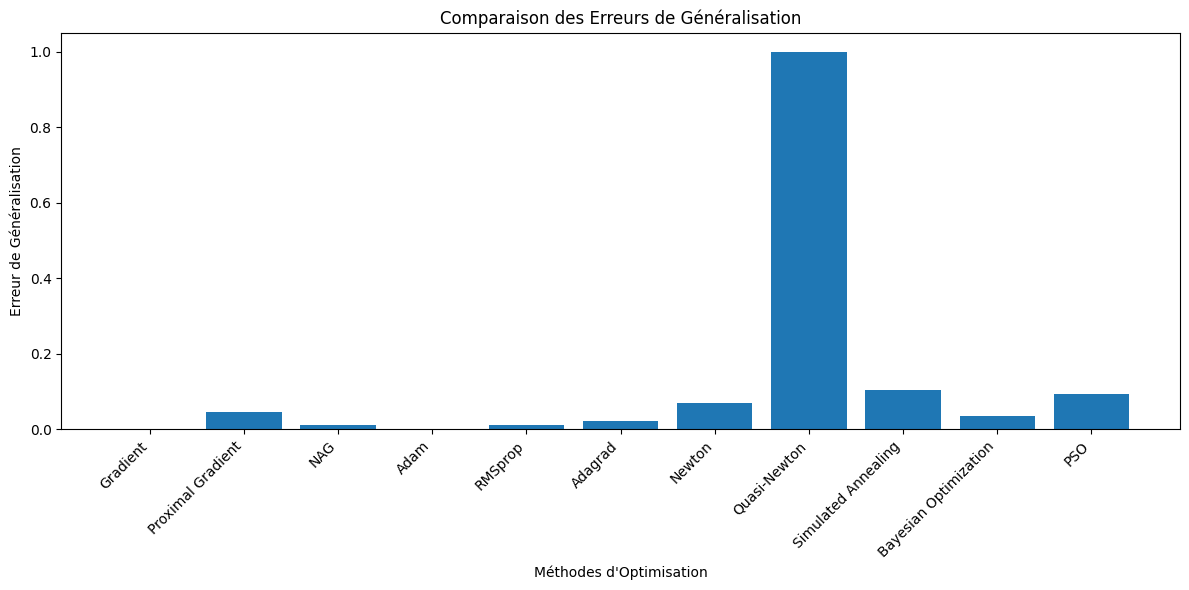

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(df_errors['Méthode'], df_errors['Erreur de Généralisation'])
plt.xlabel("Méthodes d'Optimisation")
plt.ylabel("Erreur de Généralisation")
plt.title("Comparaison des Erreurs de Généralisation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()